## Black-Box Hyperparameter Optimization With ARLBench

The most common way of optimizing hyperparameters is probably black-box optimization, i.e. using a reward or cost as the sole decision factor for a configuration's quality.
There are many great tools that do this integrated into hydra, so let's use one to tune our trusty CartPole DQN: the Hypersweeper.

First, let's use the provided runscript to do a random search:

In [1]:
!python run_arlbench.py --config-name=random_search --multirun

Couldn't import CARP-S, the CARP-S Hypersweeper will not be available.
Couldn't import DEHB, the DEHB Hypersweeper will not be available.
Couldn't import HEBO, the HEBO Hypersweeper will not be available.
Couldn't import Nevergrad, the Nevergrad Hypersweeper will not be available.
Config {'hydra': {'run': {'dir': 
'results/sobol/${algorithm}_${autorl.env_name}/${autorl.seed}'}, 'sweep': 
{'dir': 'results/sobol/${algorithm}_${autorl.env_name}/${autorl.seed}', 
'subdir': '${hydra.job.num}'}, 'launcher': {'_target_': 
'hydra._internal.core_plugins.basic_launcher.BasicLauncher'}, 'sweeper': 
{'_target_': 'hydra_plugins.hypersweeper.hypersweeper.Hypersweeper', 
'opt_constructor': 'hydra_plugins.hyper_rs.hyper_rs.make_rs', 'search_space': 
'${search_space}', 'resume': False, 'budget': None, 'n_trials': 16, 
'budget_variable': None, 'loading_variable': None, 'saving_variable': None, 
'sweeper_kwargs': {'max_parallelization': 1}}, 'help': {'app_name': 
'${hydra.job.name}', 'header': '${hydra.h

In [9]:
import pandas as pd
import numpy as np

Now let's look how well the random search worked, let's plot the performance of each configuration:

<Axes: title={'center': 'Configuration Performance over Time'}, xlabel='run_id'>

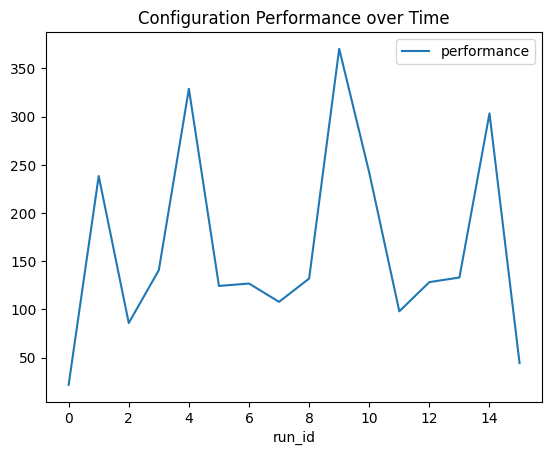

In [10]:
results_file = 'results/sobol/dqn_CartPole-v1/42/runhistory.csv'
runhistory = pd.read_csv(results_file)
runhistory.plot(x='run_id', y='performance', kind='line', title='Configuration Performance over Time')

And what worked best?

In [16]:
print("Best performance: ", np.round(max(runhistory['performance']), decimals=2))
print("")
print(runhistory.loc[runhistory['performance'].idxmax()])

Best performance:  370.4

run_id                                       9
budget                                     NaN
performance                         370.398438
hp_config.buffer_batch_size                 16
hp_config.buffer_prio_sampling           False
hp_config.buffer_size                  6925631
hp_config.initial_epsilon             0.862627
hp_config.learning_rate               0.000321
hp_config.learning_starts                  979
hp_config.target_epsilon              0.129154
hp_config.use_target_network              True
hp_config.buffer_alpha                     NaN
hp_config.buffer_beta                      NaN
hp_config.buffer_epsilon                   NaN
hp_config.target_update_interval         661.0
hp_config.tau                         0.297177
Name: 9, dtype: object


Now let's try a different optimizer, how about SMAC:

In [24]:
!python run_arlbench.py --config-name=smac -m

Couldn't import CARP-S, the CARP-S Hypersweeper will not be available.
Couldn't import DEHB, the DEHB Hypersweeper will not be available.
Couldn't import HEBO, the HEBO Hypersweeper will not be available.
Couldn't import Nevergrad, the Nevergrad Hypersweeper will not be available.
Config {'hydra': {'run': {'dir': 
'results/smac/${algorithm}_${autorl.env_name}/${smac_seed}/${seed}'}, 'sweep': 
{'dir': 'results/smac/${algorithm}_${autorl.env_name}/${smac_seed}/${seed}', 
'subdir': '${hydra.job.num}'}, 'launcher': {'_target_': 
'hydra._internal.core_plugins.basic_launcher.BasicLauncher'}, 'sweeper': 
{'_target_': 'hydra_plugins.hypersweeper.hypersweeper.Hypersweeper', 
'opt_constructor': 'hydra_plugins.hyper_smac.hyper_smac.make_smac', 
'search_space': '${search_space}', 'resume': False, 'budget': None, 'n_trials': 
16, 'budget_variable': 'autorl.n_total_timesteps', 'loading_variable': None, 
'saving_variable': None, 'sweeper_kwargs': {'min_budget': 10000, 'max_budget': 
'${environment.n_

How did this one do compared to random search?

<Axes: title={'center': 'Configuration Performance over Time'}, xlabel='run_id'>

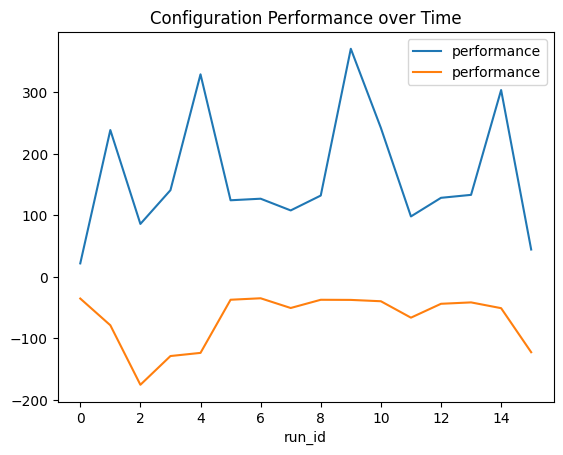

In [22]:
results_file_smac = 'results/smac/dqn_CartPole-v1/0/42/runhistory.csv'
runhistory_smac = pd.read_csv(results_file_smac)
ax = runhistory.plot(x='run_id', y='performance', kind='line', title='Configuration Performance over Time')
runhistory_smac.plot(x='run_id', y='performance', kind='line', title='Configuration Performance over Time', ax=ax)

In [23]:
print("Best performance: ", np.round(max(runhistory_smac['performance']), decimals=2))
print("")
print(runhistory.loc[runhistory_smac['performance'].idxmax()])

Best performance:  -34.9

run_id                                      6
budget                                    NaN
performance                         126.84375
hp_config.buffer_batch_size                 8
hp_config.buffer_prio_sampling           True
hp_config.buffer_size                 3180530
hp_config.initial_epsilon            0.707131
hp_config.learning_rate              0.000002
hp_config.learning_starts                 709
hp_config.target_epsilon             0.113754
hp_config.use_target_network             True
hp_config.buffer_alpha               0.528016
hp_config.buffer_beta                0.103001
hp_config.buffer_epsilon              0.00002
hp_config.target_update_interval        930.0
hp_config.tau                        0.325383
Name: 6, dtype: object
